In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('RETO_09_AZUL_OSCURO/Datos/Transformados/precio_close.csv')
symbols = df_raw['symbol'].unique()
dfs = {}
for symbol in symbols:
    df_symbol = df_raw[df_raw['symbol'] == symbol].copy()
    df_symbol = df_symbol.sort_values('date')
    df_symbol = df_symbol.set_index('date')
    dfs[symbol] = df_symbol[['close']].rename(columns={'close': 'Close'})

In [4]:
df_raw['date'] = pd.to_datetime(df_raw['date']).dt.date
df = df_raw.pivot(index='date', columns='symbol', values='close')
df.head()
df.to_csv('Accion_columna.csv')

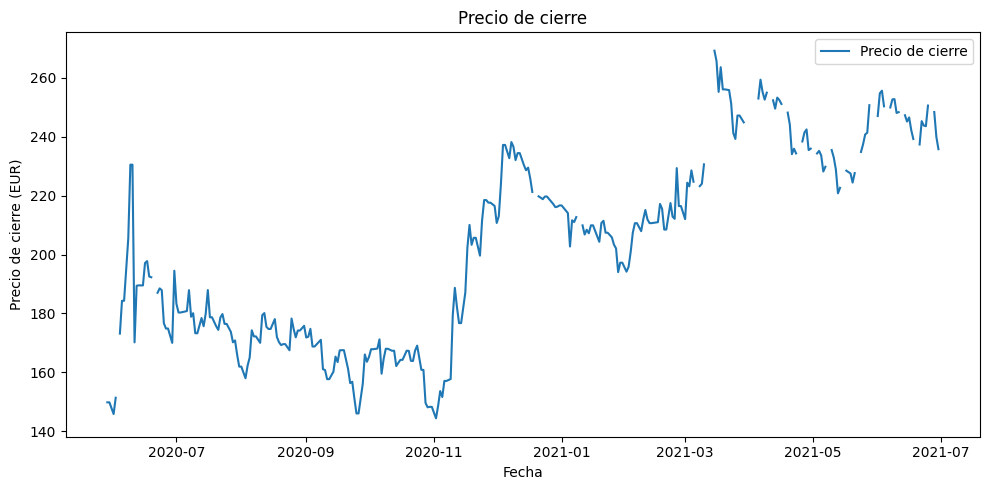

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['BA'], label='Precio de cierre')
plt.title(f'Precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

**Cambios al dia**

C:\Users\lande\AppData\Local\Temp\ipykernel_40056\1604938528.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rentabilidades_diarias = df.pct_change() * 100
C:\Users\lande\AppData\Local\Temp\ipykernel_40056\1604938528.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


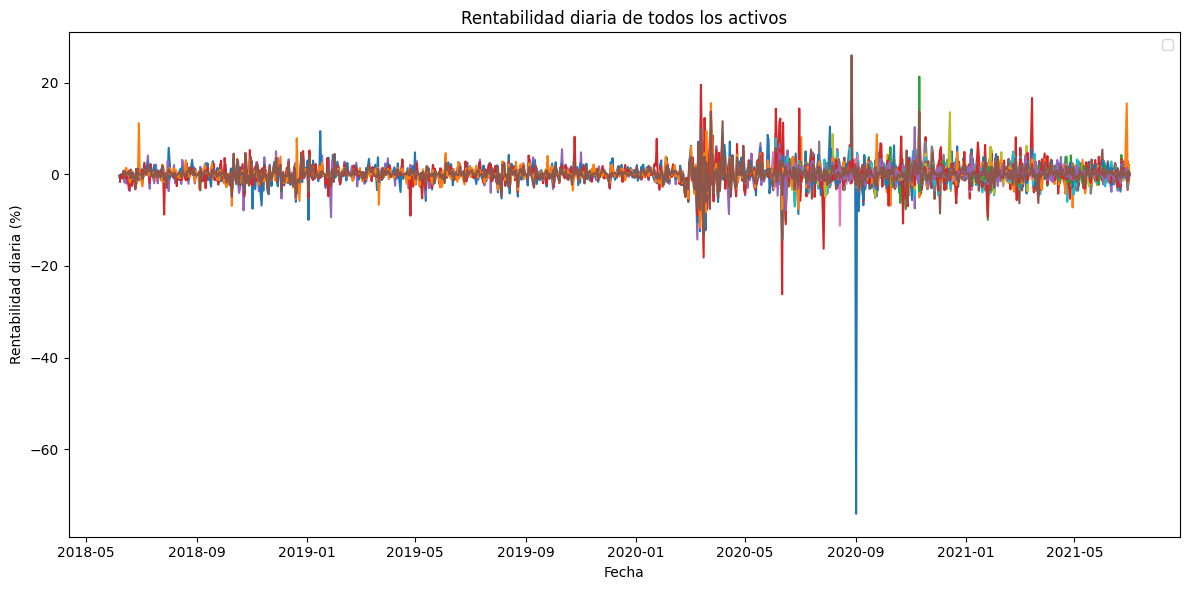

In [6]:
# Calcular la rentabilidad diaria para todos los activos
rentabilidades_diarias = df.pct_change() * 100
plt.figure(figsize=(12,6))
for col in df.columns:
    plt.plot(df.index, rentabilidades_diarias[col])
plt.title('Rentabilidad diaria de todos los activos')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad diaria (%)')
plt.legend()
plt.tight_layout()
plt.show()

Define la función de **rentabilidad anualizada**:
$r_{periodo} = (1+r)^n -1$

In [7]:
def rentabilidad_anualizada(r_diaria, n=252):
    return (np.prod(1 + r_diaria) ** (n / len(r_diaria))) - 1

In [8]:
# Calcular métricas para todos los activos, ignorando NaN en extremos y guardar en DataFrame
resultados = {}
for col in df.columns:
    serie = df[col].dropna()
    rent_diaria = rentabilidades_diarias[col].loc[serie.index].dropna()
    if len(serie) > 1 and len(rent_diaria) > 0:
        rent_media = rent_diaria.mean()
        rent_activa = (serie.iloc[-1] - serie.iloc[0]) / serie.iloc[0]
        r_diaria_decimal = rent_diaria / 100
        rent_anual = rentabilidad_anualizada(r_diaria_decimal, 252)
        resultados[col] = {
            'Rentabilidad media (%)': rent_media,
            'Rentabilidad activa (%)': rent_activa*100,
            'Rentabilidad anualizada (%)': rent_anual*100
        }
    else:
        resultados[col] = {'Rentabilidad media (%)': np.nan, 'Rentabilidad activa (%)': np.nan, 'Rentabilidad anualizada (%)': np.nan}
df_resultados = pd.DataFrame(resultados).T
df_resultados

,Rentabilidad media (%),Rentabilidad activa (%),Rentabilidad anualizada (%)
AAPL,0.047330,-29.726804,-9.125870
AMGN,0.035954,8.178289,6.555214
AXP,0.190869,67.499490,51.681974
BA,0.208730,57.362168,44.736781
CAT,0.054629,37.575951,9.048943
CRM,0.125163,35.731640,28.088484
CSCO,0.059672,16.043426,12.857453
CVX,0.066265,14.185100,11.386074
DIS,0.147153,48.976445,38.269968
DOW,0.184250,62.696978,48.917882


In [9]:
# Calcular volatilidad diaria y anualizada para todos los activos y guardar en DataFrame
vol_diaria = rentabilidades_diarias.std()
vol_anual = vol_diaria * np.sqrt(252)
df_volatilidad = pd.DataFrame({'Volatilidad diaria': vol_diaria, 'Volatilidad anualizada': vol_anual})
df_volatilidad

,Volatilidad diaria,Volatilidad anualizada
symbol,,
AAPL,3.093662,49.110364
AMGN,1.422195,22.576642
AXP,2.213015,35.130532
BA,3.378033,53.624606
CAT,1.983058,31.480065
CRM,2.304374,36.580809
CSCO,1.463633,23.234457
CVX,2.089970,33.177241
DIS,1.878220,29.815822


**Volatilidad anualizada**: $\sigma*\sqrt(n)$

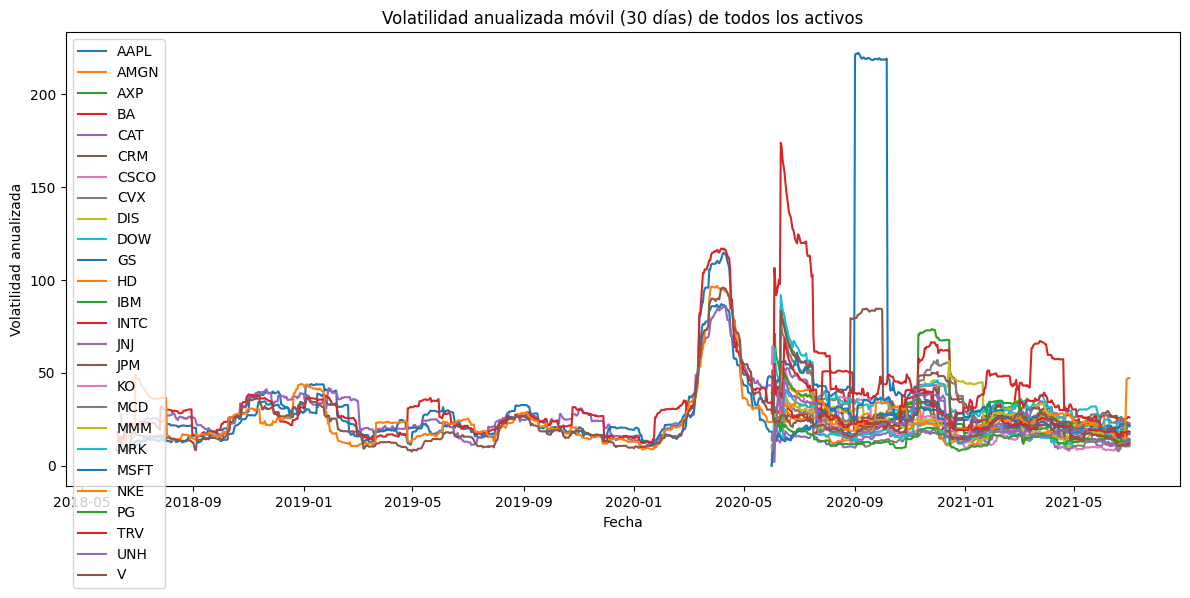

In [10]:
# Calcular y graficar la volatilidad anualizada móvil (30 días) para todos los activos
vol_30d = rentabilidades_diarias.rolling(window=30, min_periods=1).std() * np.sqrt(252)
plt.figure(figsize=(12,6))
for col in df.columns:
    plt.plot(df.index, vol_30d[col], label=col)
plt.title('Volatilidad anualizada móvil (30 días) de todos los activos')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad anualizada')
plt.legend()
plt.tight_layout()
plt.show()

**Ratio de Sharpe**: $S_h = \frac{r-r_f}{\sigma}$

In [11]:
# Calcular ratio de Sharpe para todos los activos y guardar en DataFrame
rf = 0.025
sharpe = {}
for col in df.columns:
    vol_anual_col = vol_anual[col] if col in vol_anual else np.nan
    rent_anual_col = df_resultados.loc[col, 'Rentabilidad anualizada (%)'] if col in df_resultados.index else np.nan
    if not np.isnan(vol_anual_col) and not np.isnan(rent_anual_col) and vol_anual_col != 0:
        sharpe[col] = (rent_anual_col/100 - rf) / vol_anual_col
    else:
        sharpe[col] = np.nan
df_sharpe = pd.DataFrame({'Sharpe': sharpe})
df_sharpe

,Sharpe
AAPL,-0.002367
AMGN,0.001796
AXP,0.014000
BA,0.007876
CAT,0.002080
CRM,0.006995
CSCO,0.004458
CVX,0.002678
DIS,0.011997
DOW,0.013329


$Drawdown_i = \frac{p_i}{p_{max}}$

$Max-drawdown = min(drawdown_i)_n$

In [12]:
# Calcular drawdown máximo para todos los activos y guardar en DataFrame
max_drawdown = {}
for col in df.columns:
    serie = df[col].dropna()
    if len(serie) > 1:
        max_close = serie.cummax()
        drawdown = serie / max_close - 1
        max_drawdown[col] = drawdown.min()
    else:
        max_drawdown[col] = np.nan
df_drawdown = pd.DataFrame({'Max Drawdown': max_drawdown})
df_drawdown

,Max Drawdown
AAPL,-0.788891
AMGN,-0.170799
AXP,-0.203220
BA,-0.373579
CAT,-0.419463
CRM,-0.269938
CSCO,-0.258467
CVX,-0.352189
DIS,-0.161656
DOW,-0.162309


C:\Users\lande\AppData\Local\Temp\ipykernel_40056\1425164706.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


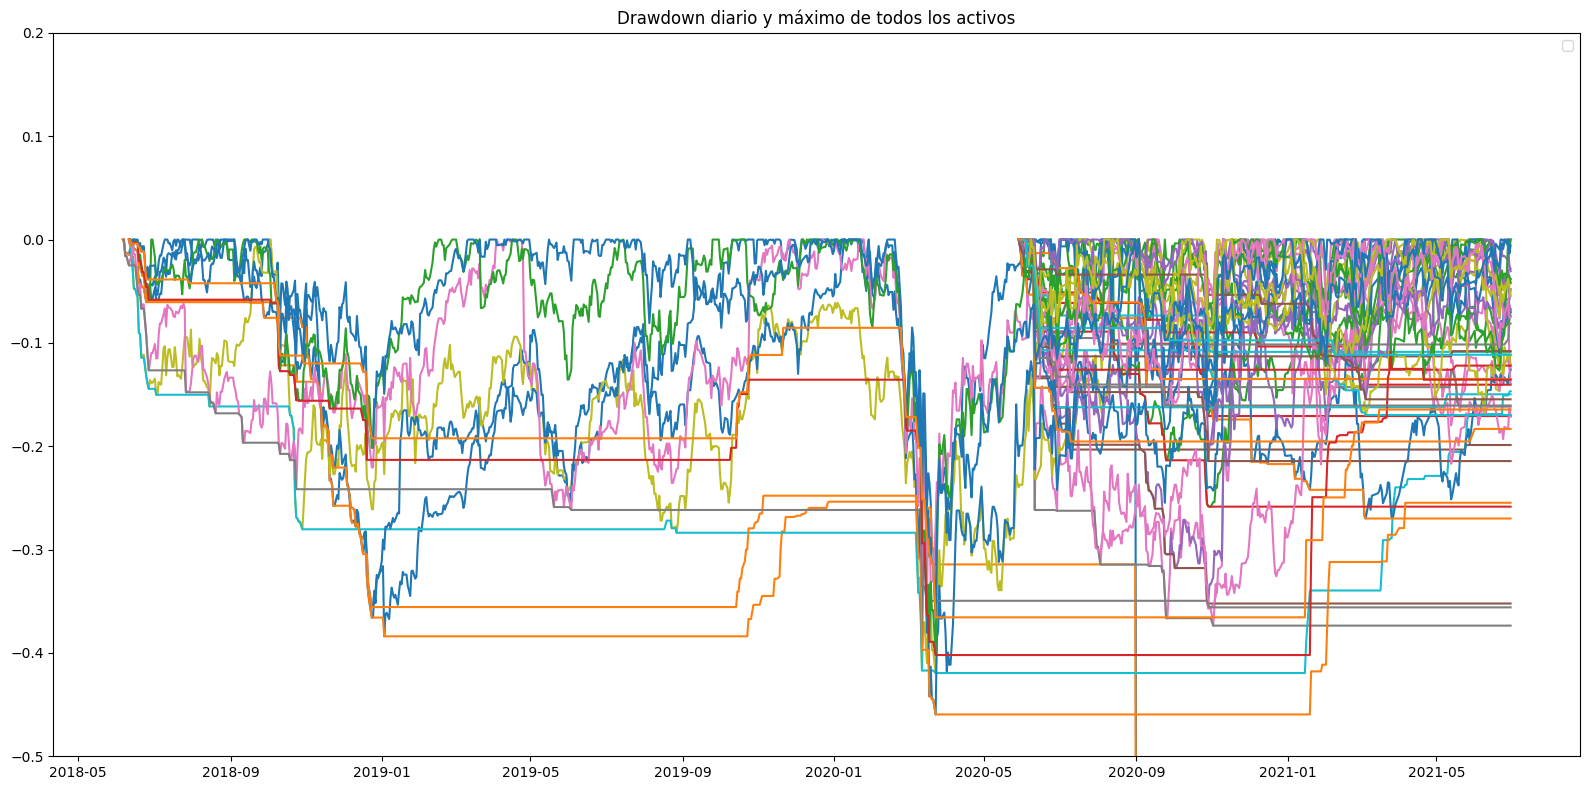

In [13]:
# Calcular y graficar el drawdown diario y máximo para todos los activos
fig, ax = plt.subplots(figsize=(16, 8))
for col in df.columns:
    serie = df[col].dropna()
    if len(serie) > 1:
        max_close = serie.cummax()
        daily_drawdown = serie / max_close - 1
        max_daily_drawdown = daily_drawdown.rolling(window=252, min_periods=1).min()
        ax.plot(serie.index, daily_drawdown)
        ax.plot(serie.index, max_daily_drawdown)
ax.set_ylim(-0.5, 0.2)
ax.legend()
plt.title('Drawdown diario y máximo de todos los activos')
plt.tight_layout()
plt.show()